In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
dir(stats)
import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


In [14]:
#Função de leitura dos dados------------------------------------
def pd_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        next(reader, None)  # ignora o cabeçalho
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    return data

In [15]:
path = 'ÁREA_QUEIMADA_192_CORRELAÇÃO.csv'

df = pd.read_csv(path)

In [16]:
df= df.drop(df.columns[0], axis = 1)

In [17]:
df.head()

,Área,Elev,Declive,ABG,Fator K,Rest,dNBR,dNDVI,IIS12,Freq
0,0.082661,759.052098,17.557974,18.50,0.0112,1,0.559,0.694,3,1
1,0.082625,802.376750,18.752726,126.72,0.0347,3,0.108,0.052,3,1
2,0.330531,977.174011,17.787438,85.70,0.0254,3,0.139,0.087,5,1
3,0.082633,994.688130,16.576836,85.70,0.0254,3,0.193,0.151,5,1
4,0.330414,1108.779999,14.793242,126.72,0.0254,3,0.147,0.116,3,2


In [18]:
df.info

<bound method DataFrame.info of          Área         Elev    Declive     ABG  Fator K  Rest   dNBR  dNDVI  \
0    0.082661   759.052098  17.557974   18.50   0.0112     1  0.559  0.694   
1    0.082625   802.376750  18.752726  126.72   0.0347     3  0.108  0.052   
2    0.330531   977.174011  17.787438   85.70   0.0254     3  0.139  0.087   
3    0.082633   994.688130  16.576836   85.70   0.0254     3  0.193  0.151   
4    0.330414  1108.779999  14.793242  126.72   0.0254     3  0.147  0.116   
..        ...          ...        ...     ...      ...   ...    ...    ...   
187  0.082652   677.324487  36.922595    8.05   0.0112     1  0.252 -0.025   
188  0.082652   692.031709  33.392612    8.05   0.0112     1  0.160 -0.024   
189  0.330667   715.110001  14.369122    8.05   0.0112     1  0.124  0.059   
190  0.165201  1217.595032  26.863307    8.05   0.0254     3  0.284  0.208   
191  0.082652   658.924112  22.454065    8.05   0.0112     1  0.279 -0.015   

     IIS12  Freq  
0        3  

In [19]:
df.corr(method='spearman', min_periods=1)

,Área,Elev,Declive,ABG,Fator K,Rest,dNBR,dNDVI,IIS12,Freq
Área,1.000000,-0.286391,-0.065493,0.114555,-0.186850,-0.063488,-0.003246,0.017730,-0.081040,0.184408
Elev,-0.286391,1.000000,-0.091353,-0.069994,0.698148,0.346119,0.138922,0.200073,0.260740,-0.229048
Declive,-0.065493,-0.091353,1.000000,0.027586,-0.106210,-0.126503,0.080281,0.021840,0.109933,-0.047460
ABG,0.114555,-0.069994,0.027586,1.000000,-0.015851,0.373803,-0.068233,0.007057,0.164372,-0.052470
Fator K,-0.186850,0.698148,-0.106210,-0.015851,1.000000,0.476764,0.072977,0.196526,0.232068,-0.160961
Rest,-0.063488,0.346119,-0.126503,0.373803,0.476764,1.000000,0.023514,0.256300,0.203876,0.161515
dNBR,-0.003246,0.138922,0.080281,-0.068233,0.072977,0.023514,1.000000,0.917032,0.281946,-0.023682
dNDVI,0.017730,0.200073,0.021840,0.007057,0.196526,0.256300,0.917032,1.000000,0.257039,0.083856
IIS12,-0.081040,0.260740,0.109933,0.164372,0.232068,0.203876,0.281946,0.257039,1.000000,-0.506270
Freq,0.184408,-0.229048,-0.047460,-0.052470,-0.160961,0.161515,-0.023682,0.083856,-0.506270,1.000000


In [21]:
pearsoncorr = df.corr(method = 'pearson', min_periods=1)

In [29]:
#Correlação e p valor de Área

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.Área, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,1.0000,0.0000
Elev,-0.0356,0.6244
Declive,-0.1517,0.0357
ABG,0.0960,0.1852
Fator K,0.0309,0.6706
Rest,0.0204,0.7787
dNBR,0.1119,0.1223
dNDVI,0.1301,0.0721
IIS12,0.0205,0.7780
Freq,0.0487,0.5025


In [30]:
#Correlação e p valor de Elevação

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.Elev, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,-0.0356,0.6244
Elev,1.0000,0.0000
Declive,-0.1558,0.0309
ABG,0.0755,0.2981
Fator K,0.7843,0.0000
Rest,0.5905,0.0000
dNBR,0.1073,0.1384
dNDVI,0.2384,0.0009
IIS12,0.2804,0.0001
Freq,-0.1388,0.0548


In [31]:
#Correlação e p valor de Declive

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.Declive, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,-0.1517,0.0357
Elev,-0.1558,0.0309
Declive,1.0000,0.0000
ABG,0.0030,0.9673
Fator K,-0.1290,0.0745
Rest,-0.1694,0.0189
dNBR,0.0468,0.5189
dNDVI,-0.0624,0.3897
IIS12,0.1021,0.1587
Freq,-0.0481,0.5080


In [32]:
#Correlação e p valor de ABG

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.ABG, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,0.0960,0.1852
Elev,0.0755,0.2981
Declive,0.0030,0.9673
ABG,1.0000,0.0000
Fator K,0.0178,0.8063
Rest,0.4023,0.0000
dNBR,-0.0761,0.2942
dNDVI,0.0288,0.6913
IIS12,0.1807,0.0121
Freq,-0.0632,0.3834


In [34]:
#Correlação e p valor de Rest

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.Rest, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,0.0204,0.7787
Elev,0.5905,0.0000
Declive,-0.1694,0.0189
ABG,0.4023,0.0000
Fator K,0.4580,0.0000
Rest,1.0000,0.0000
dNBR,-0.0303,0.6766
dNDVI,0.2224,0.0019
IIS12,0.1931,0.0073
Freq,0.1615,0.0252


In [35]:
#Correlação e p valor de dNBR

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.dNBR, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,0.1119,0.1223
Elev,0.1073,0.1384
Declive,0.0468,0.5189
ABG,-0.0761,0.2942
Fator K,0.0608,0.4021
Rest,-0.0303,0.6766
dNBR,1.0000,0.0000
dNDVI,0.8678,0.0000
IIS12,0.2541,0.0004
Freq,-0.0297,0.6826


In [36]:
#Correlação e p valor de dNDVI

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.dNDVI, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,0.1301,0.0721
Elev,0.2384,0.0009
Declive,-0.0624,0.3897
ABG,0.0288,0.6913
Fator K,0.1796,0.0127
Rest,0.2224,0.0019
dNBR,0.8678,0.0000
dNDVI,1.0000,0.0000
IIS12,0.1995,0.0055
Freq,0.0754,0.2988


In [37]:
#Correlação e p valor de IIS12

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.IIS12, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,0.0205,0.7780
Elev,0.2804,0.0001
Declive,0.1021,0.1587
ABG,0.1807,0.0121
Fator K,0.2326,0.0012
Rest,0.1931,0.0073
dNBR,0.2541,0.0004
dNDVI,0.1995,0.0055
IIS12,1.0000,0.0000
Freq,-0.5127,0.0000


In [40]:
#Correlação e p valor de Freq

corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    r,p = stats.pearsonr(df.Freq, df[col])
    corr_df.loc[col] = (round(r,4)),(round(p,4))

corr_df

,r,p
Área,0.0487,0.5025
Elev,-0.1388,0.0548
Declive,-0.0481,0.5080
ABG,-0.0632,0.3834
Fator K,-0.1650,0.0222
Rest,0.1615,0.0252
dNBR,-0.0297,0.6826
dNDVI,0.0754,0.2988
IIS12,-0.5127,0.0000
Freq,1.0000,0.0000


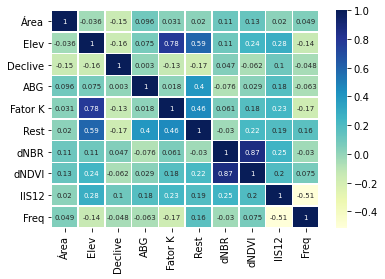

In [41]:
f1=sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap="YlGnBu",
            annot=True,
            annot_kws={"size":7},
            linewidth=0.5)
fig = f1
plt.savefig('Matriz de correlação_queimadas_valor.png')

In [111]:
df.corr(method = 'kendall', min_periods=1)

,Área,Elevação,Declive,ABG,Fator K,P. Rest.,dNBR,dNDVI,IIS_12,Frequência
Área,1.000000,-0.199043,-0.044141,0.090145,-0.150997,-0.052071,0.001314,0.012861,-0.065970,0.151247
Elevação,-0.199043,1.000000,-0.062186,-0.056451,0.577713,0.283614,0.098587,0.142810,0.210532,-0.187685
Declive,-0.044141,-0.062186,1.000000,0.021600,-0.084849,-0.103658,0.053258,0.013395,0.089590,-0.038889
ABG,0.090145,-0.056451,0.021600,1.000000,-0.023116,0.349173,-0.053379,0.001381,0.151993,-0.049012
Fator K,-0.150997,0.577713,-0.084849,-0.023116,1.000000,0.467990,0.058737,0.160408,0.225433,-0.157998
P. Rest.,-0.052071,0.283614,-0.103658,0.349173,0.467990,1.000000,0.019279,0.210128,0.202370,0.161515
dNBR,0.001314,0.098587,0.053258,-0.053379,0.058737,0.019279,1.000000,0.786115,0.229556,-0.019417
dNDVI,0.012861,0.142810,0.013395,0.001381,0.160408,0.210128,0.786115,1.000000,0.207696,0.068749
IIS_12,-0.065970,0.210532,0.089590,0.151993,0.225433,0.202370,0.229556,0.207696,1.000000,-0.502529
Frequência,0.151247,-0.187685,-0.038889,-0.049012,-0.157998,0.161515,-0.019417,0.068749,-0.502529,1.000000


Text(0.5, 1.0, 'Matriz de correlação de Kendall')

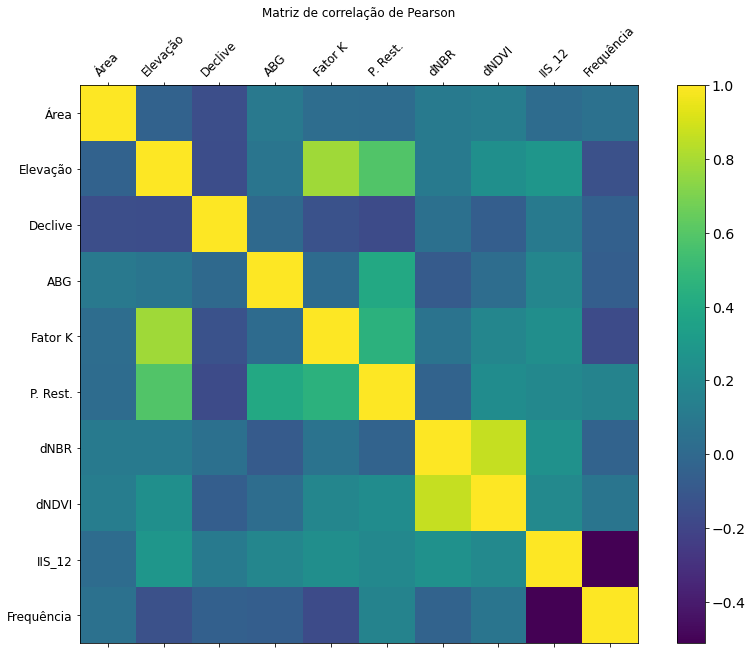

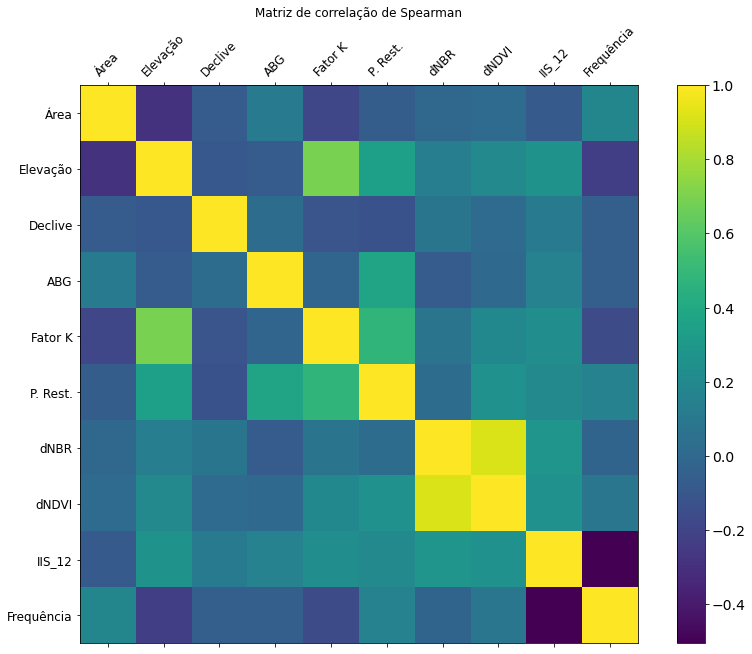

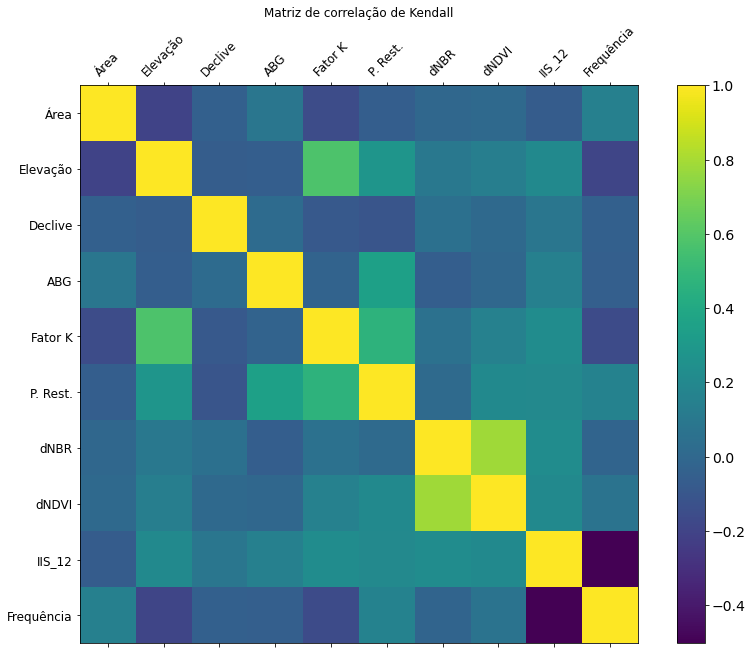

In [114]:
f = plt.figure(figsize=(14, 10))
plt.matshow(df.corr(method = 'pearson', min_periods=1), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlação de Pearson')
fig = f
plt.savefig('Matriz de correlação_queimadas.png')

f = plt.figure(figsize=(14, 10))
plt.matshow(df.corr(method = 'spearman', min_periods=1), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlação de Spearman')

f = plt.figure(figsize=(14, 10))
plt.matshow(df.corr(method = 'kendall', min_periods=1), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlação de Kendall')



<AxesSubplot:>

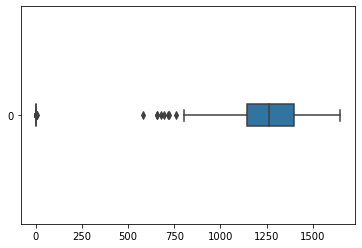

In [80]:
ax1 = sns.boxplot(data= df.Área, orient='h', width=0.1)
ax.figure.set_size_inches(4, 2)
ax.set_title('Box plot', fontsize=16)
#ax.set_xlabel('Áreas', fontsize=12)
ax1

ax2 = sns.boxplot(data= df.Elevação, orient='h', width=0.1)
ax.figure.set_size_inches(4, 2)
ax.set_title('Box plot', fontsize=16)
#ax.set_xlabel('Altimetria', fontsize=12)
ax2

C:\Users\cheil\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cheil\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cheil\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cheil\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cheil\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cheil\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

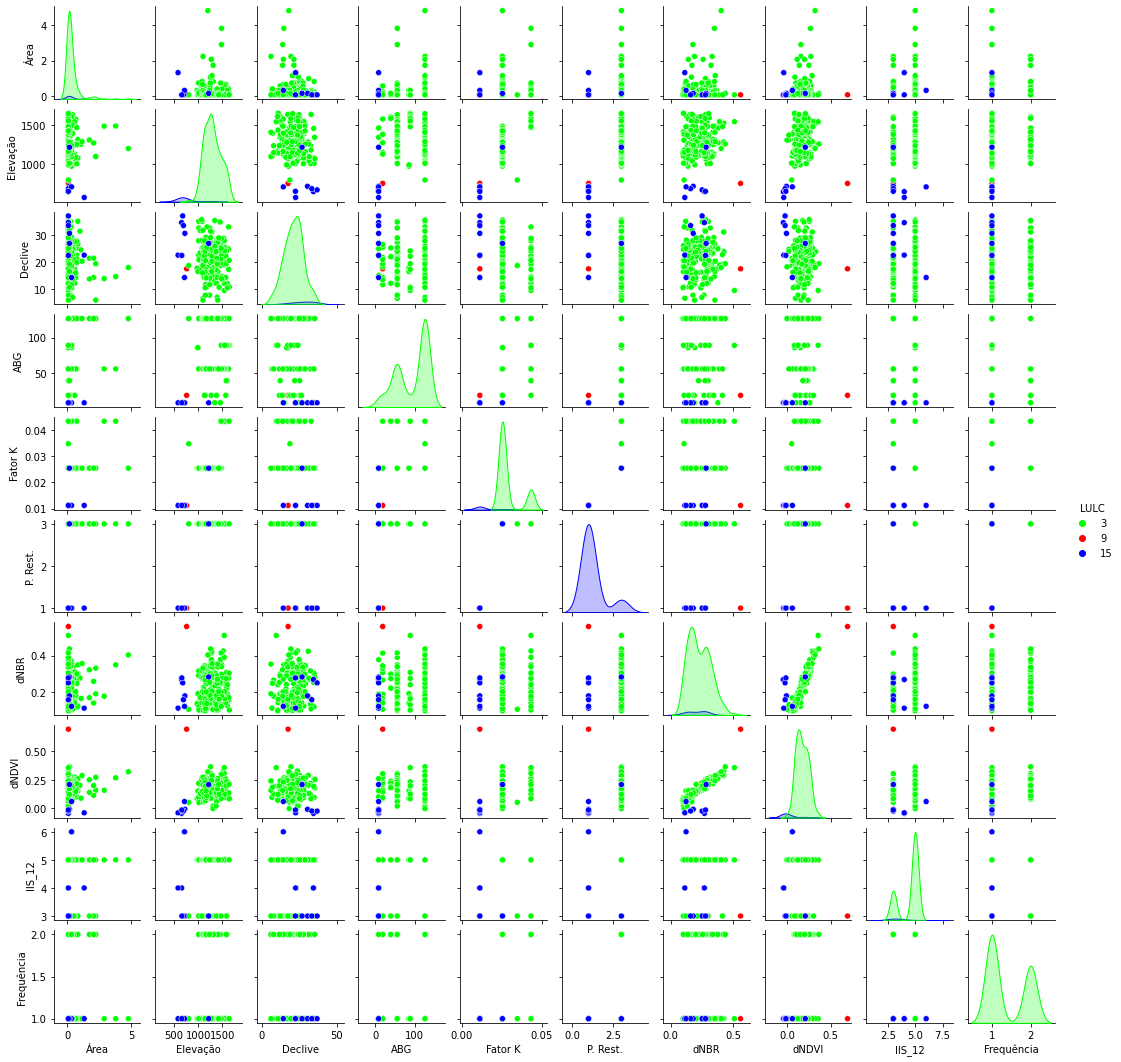

In [102]:
fig = sns.pairplot(df, hue="LULC", height=1.5, palette= 'brg_r')
plt.savefig('Correlação_áreas_queimadas.png')

In [107]:
def read_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        next(reader, None)  # ignora o cabeçalho
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    return data

In [108]:
path = 'ÁREA_QUEIMADA_192_CORRELAÇÃO.csv'

data = read_data(path)

x1 = data[:,1:2]
y1 = data[:, 0:1]

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 6: character maps to <undefined>